In [527]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

In [528]:
path = 'Clima.csv'

df = pd.read_csv(path, sep = ',')
df

,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281
...,...,...,...,...,...,...
67,Seattle,-122.335167,47.608013,Aug,7,281
68,Seattle,-122.335167,47.608013,Sep,8,221
69,Seattle,-122.335167,47.608013,Oct,9,142
70,Seattle,-122.335167,47.608013,Nov,10,72


In [529]:
display(df.nunique().to_frame().T.set_index(pd.Index(['cant_unique'])))
display(df.isnull().sum().to_frame().T.set_index(pd.Index(['cant_nulos'])))
display(df[df.duplicated(keep='first')])


,city,lon,lat,month,monthnum,sunshine
cant_unique,6,6,6,12,12,61


,city,lon,lat,month,monthnum,sunshine
cant_nulos,0,0,0,0,0,0


,city,lon,lat,month,monthnum,sunshine


In [530]:
df.columns
for col in df.columns:
    print (df[col].unique())

['Chicago' 'Houston' 'Miami' 'New York' 'San Francisco' 'Seattle']
[ -87.623177  -95.358421  -80.191788  -73.935242 -122.446747 -122.335167]
[41.881832 29.749907 25.761681 40.73061  37.733795 47.608013]
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[135 136 187 215 281 311 318 283 226 193 113 106 144 141 212 266 298 294
 238 239 181 146 222 227 275 280 251 267 263 216 209 154 171 213 237 268
 289 302 271 235 169 155 165 182 314 330 300 272 243 189 156  69 108 178
 207 253 312 221 142  72  52]


Text(0.5, 1.0, 'Horas de sol - Promedio mensual')

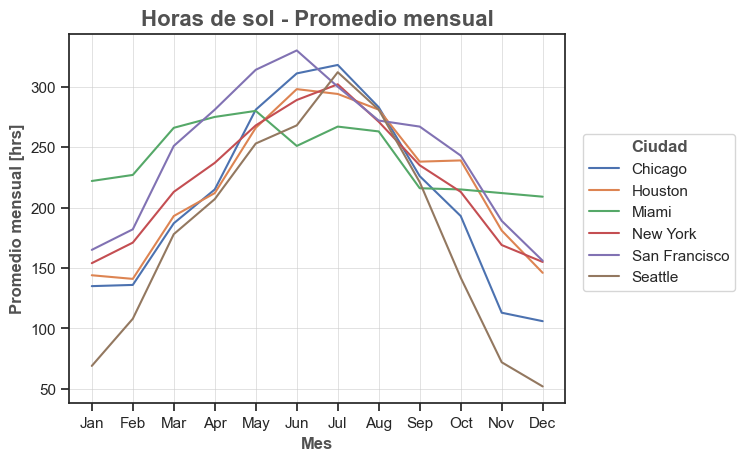

In [603]:
fig,ax = plt.subplots()

for city in df['city'].unique():
    df_city = df[df['city'] == city]
    sns.lineplot(data = df_city, x = df_city.month, y = df_city.sunshine, label = city)

ax.grid(lw = 0.4)
legend = ax.legend(bbox_to_anchor=(1.02, 0.75), title = 'Ciudad', markerscale = 0)
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
legend.get_title().set_alpha(0.8)

ax.set_xlabel('Mes', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel('Promedio mensual [hrs]', fontsize = 12, fontweight = 'bold', alpha = 0.8)
ax.set_title ('Horas de sol - Promedio mensual', fontsize = 16, fontweight = 'bold', alpha = 0.8)
    

Text(0.5, 0.98, 'Promedio mensual de horas de sol - Distribución')

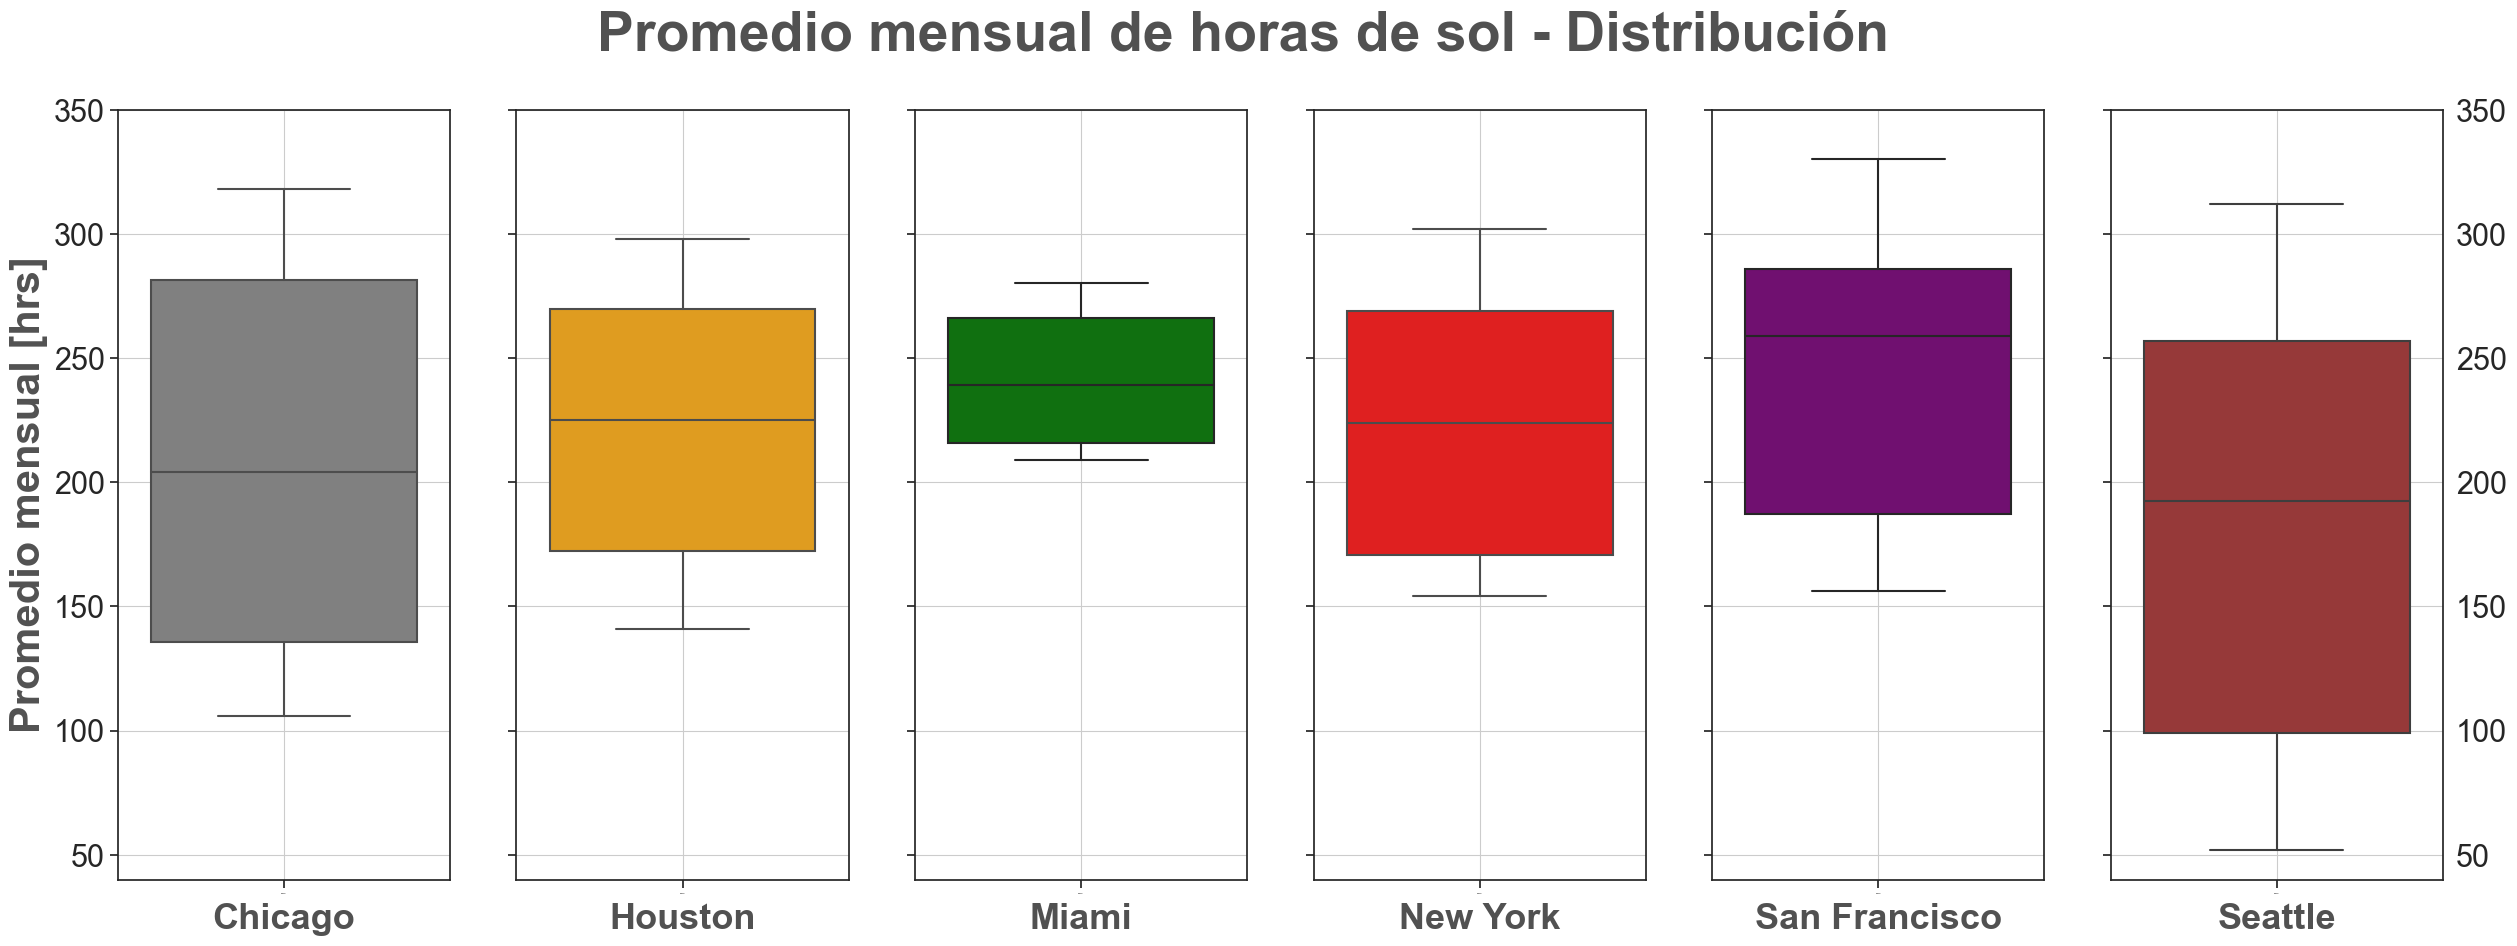

In [604]:
path = 'Clima.csv'
df = pd.read_csv(path, sep = ',')

fig,ax = plt.subplots(ncols=6, nrows=1, figsize = (30,10), sharey = True)
colors = ['gray', 'orange', 'green', 'red', 'purple', 'brown']

i = 0
for city in df['city'].unique():
    df_city = df[df['city'] == city]
    ax1 = ax.flat[i]
    sns.boxplot(data = df_city[['sunshine']], ax = ax1, color=colors[i])
    ax1.set_ylim(40, 350)
    ax1.set_title(city, fontweight = 'bold', fontsize = 26, alpha = 0.8, y = -0.075)
    ax1.grid(lw = 0.8)
    ax1.tick_params (axis='y', labelsize = 0)
    ax1.tick_params (axis='x', labelsize = 0)
        
    i += 1

ax[0].tick_params (axis='y', labelsize = 22)
ax[5].tick_params (axis='y', labelsize = 22, labelright = True, labelleft = False)
ax[0].set_ylabel ('Promedio mensual [hrs]', fontweight = 'bold', fontsize = 30, alpha = 0.8)
fig.suptitle ('Promedio mensual de horas de sol - Distribución', fontsize = 40, fontweight = 'bold', alpha = 0.8)


In [533]:
df_rangos

,city,rango,lat,lon,max,min,u_lat,u_lon
5,Seattle,260,47.608013,-122.335167,312.0,52.0,0.626080,0.276648
0,Chicago,212,41.881832,-87.623177,318.0,106.0,0.568818,0.623768
4,San Francisco,174,37.733795,-122.446747,330.0,156.0,0.527338,0.275533
1,Houston,157,29.749907,-95.358421,298.0,141.0,0.447499,0.546416
3,New York,148,40.730610,-73.935242,302.0,154.0,0.557306,0.760648
2,Miami,71,25.761681,-80.191788,280.0,209.0,0.407617,0.698082


Text(0.5, 1.0, 'Promedio mensual de horas de sol - Rango anual')

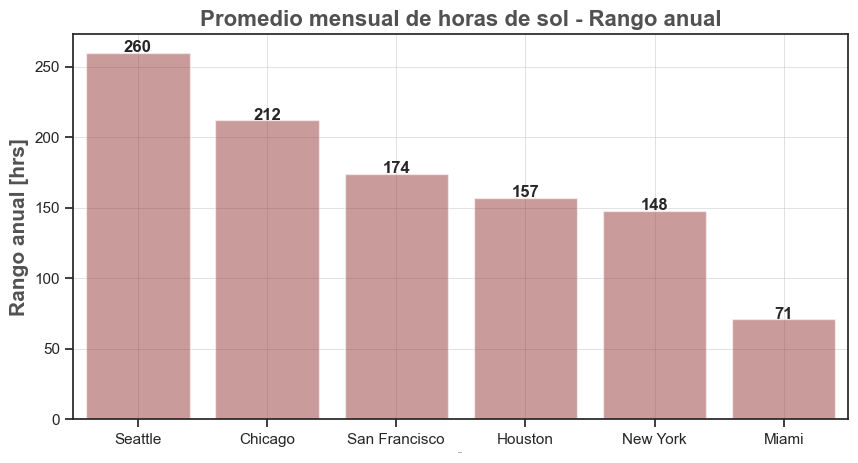

In [597]:
rangos = {}
for city in df['city'].unique():
    df_city = df[df['city'] == city]
    rangos[city] = df_city['sunshine'].max() - df_city['sunshine'].min()


df_rangos = pd.DataFrame.from_dict(rangos, orient='index', columns=['Values']).reset_index()
df_rangos = df_rangos.rename(columns={'index': 'city', 'Values': 'rango'})

fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data = df_rangos.sort_values(by = 'rango', inplace = True, ascending = False), x = df_rangos.city, y = df_rangos.rango, color = 'brown', alpha = 0.5)
ax.grid(lw = 0.4)

for i in range(6):
    plt.text(x=i, y=df_rangos.iloc[i]['rango'] + 0.40, s=str(df_rangos.iloc[i]['rango']), ha='center', fontweight = 'bold')

ax.set_xlabel ('Ciudad', fontsize = 0, fontweight = 'bold', alpha = 0.8)
ax.set_ylabel ('Rango anual [hrs]', fontsize = 15, fontweight = 'bold', alpha = 0.8)
ax.set_title ('Promedio mensual de horas de sol - Rango anual', fontsize = 16, fontweight = 'bold', alpha = 0.8)

In [592]:
df_rangos['lat'] = [float(df[df['city'] == city].lat.unique()) for city in df_rangos['city']]
df_rangos['lon'] = [float(df[df['city'] == city].lon.unique()) for city in df_rangos['city']]
df_rangos['max'] = [float(df[df['city'] == city].sunshine.max()) for city in df_rangos['city']]
df_rangos['min'] = [float(df[df['city'] == city].sunshine.min()) for city in df_rangos['city']]

df_rangos['u_lat'] = [float(df[df['city'] == city].lat.unique()/100+0.15) for city in df_rangos['city']]
df_rangos['u_lon'] = [float(df[df['city'] == city].lon.unique()/100+1.5) for city in df_rangos['city']]
df_rangos

,city,rango,lat,lon,max,min,u_lat,u_lon
5,Seattle,260,47.608013,-122.335167,312.0,52.0,0.626080,0.276648
0,Chicago,212,41.881832,-87.623177,318.0,106.0,0.568818,0.623768
4,San Francisco,174,37.733795,-122.446747,330.0,156.0,0.527338,0.275533
1,Houston,157,29.749907,-95.358421,298.0,141.0,0.447499,0.546416
3,New York,148,40.730610,-73.935242,302.0,154.0,0.557306,0.760648
2,Miami,71,25.761681,-80.191788,280.0,209.0,0.407617,0.698082


In [593]:
u = dict.fromkeys(df_rangos.city)
u['Chicago'] = [float(df_rangos[df_rangos['city'] == 'Chicago'].lon/100 + 1.505), float(df_rangos[df_rangos['city'] == 'Chicago'].lat/100 + 0.05)]
u['Houston'] = [float(df_rangos[df_rangos['city'] == 'Houston'].lon/100 + 1.5), float(df_rangos[df_rangos['city'] == 'Houston'].lat/100 - 0.1)]
u['Miami'] = [float(df_rangos[df_rangos['city'] == 'Miami'].lon/100 + 1.5175), float(df_rangos[df_rangos['city'] == 'Miami'].lat/100 - 0.025)]
u['New York'] = [float(df_rangos[df_rangos['city'] == 'New York'].lon/100 + 1.53), float(df_rangos[df_rangos['city'] == 'New York'].lat/100 + 0.06)]
u['San Francisco'] = [float(df_rangos[df_rangos['city'] == 'San Francisco'].lon/100 + 1.45), float(df_rangos[df_rangos['city'] == 'San Francisco'].lat/100 + 0)]
u['Seattle'] = [float(df_rangos[df_rangos['city'] == 'Seattle'].lon/100 + 1.42), float(df_rangos[df_rangos['city'] == 'Seattle'].lat/100 + 0.1)]

u

{'Seattle': [0.19664832999999993, 0.57608013],
 'Chicago': [0.6287682299999999, 0.46881832],
 'San Francisco': [0.22553252999999995, 0.37733795000000003],
 'Houston': [0.54641579, 0.19749906999999997],
 'New York': [0.79064758, 0.4673061],
 'Miami': [0.7155821200000001, 0.23261680999999998]}

Text(0.5, 1.0, 'Promedio mensual de horas de sol - Rango anual')

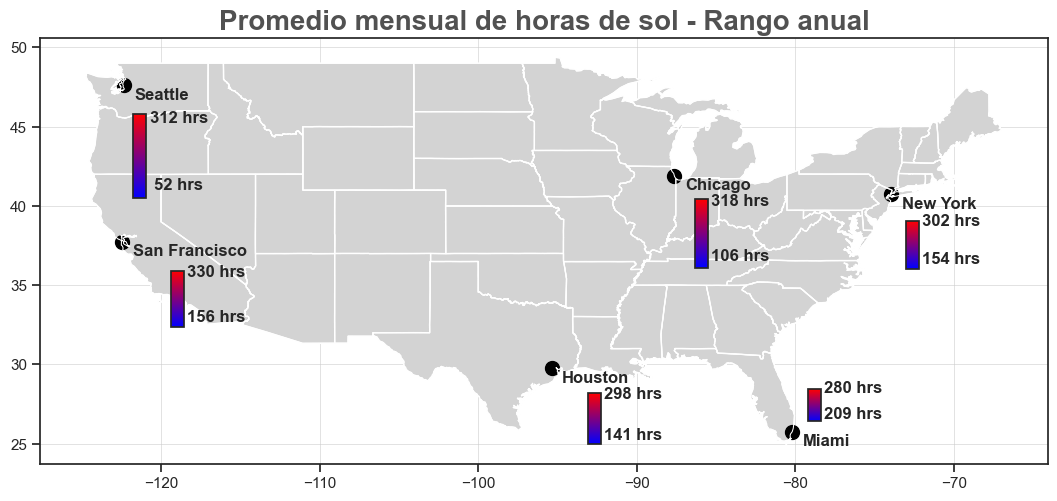

In [595]:
# Carga de mapa de USA
usa = gpd.read_file("States_shapefile.shx")

gdf = gpd.GeoDataFrame(df_rangos, geometry=gpd.points_from_xy(df_rangos.lon, df_rangos.lat))

# Gradiente de colores
gradient_colors = ['#0000FF','#FF0000']
gradient_cmap = plt.cm.colors.LinearSegmentedColormap.from_list('gradient_cmap', gradient_colors)
gradient_cmap = plt.cm.colors.LinearSegmentedColormap.from_list('gradient_cmap', gradient_colors)

# Gráfico de mapa y ploteo de ciudades
fig, ax = plt.subplots(figsize=(13, 6.5))
usa.boundary.plot(ax=ax, linewidth=0.75, color='white')
usa.plot(ax=ax, facecolor='lightgray')
gdf.plot(ax=ax, color='black', markersize=100, label='Cities', alpha = 1)
ax.grid(lw = 0.4)

for idx, row in gdf.iterrows():
    ax.annotate(row['city'], (row['lon'], row['lat']), xytext=(7.5, -10), textcoords="offset points", fontweight = 'bold')

    sm = ScalarMappable(cmap=gradient_cmap, norm=plt.Normalize(vmin=row['min'], vmax=row['max']))
    sm.set_array([])
    
    #Agrego barra de colores
    cax = fig.add_axes([u[row['city']][0], u[row['city']][1], 0.01, max(0.05, row['rango']/2000)])
    cb = plt.colorbar(sm, cax=cax, orientation='vertical', ticks = [])
    cax.yaxis.set_ticks_position('right')

    cax.text(3.5, 0.1, str(row['min']).replace('.0','')+' hrs', ha='center', va='baseline', fontsize=12, transform=cax.transAxes, fontweight = 'bold')
    cax.text(3.5, 0.9, str(row['max']).replace('.0','')+' hrs', ha='center', va='baseline', fontsize=12, transform=cax.transAxes, fontweight = 'bold')

# Agrego título
ax.set_title ('Promedio mensual de horas de sol - Rango anual', fontsize = 20, fontweight = 'bold', alpha = 0.8)